In [3]:
import pandas as pd
import numpy as np

In [4]:
pokemon = pd.read_csv("C:/Users/Dell/OneDrive/Desktop/DATASET.csv")
pokemon.head(10)

,First_pokemon,Second_pokemon,Winner,Name_P1,HP_P1,Attack_P1,Defense_P1,Generation_P1,Legendary_P1,Name_P2,...,p2_japanese_name,p2_name,p2_percentage_male,p2_pokedex_number,p2_sp_attack,p2_sp_defense,p2_speed,p2_type1,p2_type2,p2_weight_kg
0,266,298,298.0,Larvitar,50,64,50,2,False,Nuzleaf,...,Konohanaコノハナ,Nuzleaf,50.0,274.0,60.0,40.0,60.0,grass,dark,28.0
1,702,701,701.0,Virizion,91,90,72,5,True,Terrakion,...,Terrakionテラキオン,Terrakion,NaN,639.0,72.0,90.0,108.0,rock,fighting,260.0
2,191,668,668.0,Togetic,55,40,85,2,False,Beheeyem,...,Ohbemオーベム,Beheeyem,50.0,606.0,125.0,95.0,40.0,psychic,NaN,34.5
3,237,683,683.0,Slugma,40,40,40,2,False,Druddigon,...,Crimganクリムガン,Druddigon,50.0,621.0,60.0,90.0,48.0,dragon,NaN,139.0
4,151,231,151.0,Omastar,70,60,125,1,False,Shuckle,...,Tsubotsuboツボツボ,Shuckle,50.0,213.0,10.0,230.0,5.0,bug,rock,20.5
5,657,752,657.0,Joltik,50,47,50,5,False,Aegislash Shield Forme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,192,134,134.0,Natu,40,50,45,2,False,Jynx,...,Rougelaルージュラ,Jynx,0.0,124.0,115.0,95.0,95.0,ice,psychic,40.6
7,73,545,545.0,Machop,70,80,50,1,False,Giratina Altered Forme,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,220,763,763.0,Pineco,50,65,90,2,False,Clauncher,...,Udeppouウデッポウ,Clauncher,50.0,692.0,58.0,63.0,44.0,water,NaN,8.3
9,302,31,31.0,Wingull,40,30,30,3,False,Pikachu,...,Pikachuピカチュウ,Pikachu,50.0,25.0,50.0,50.0,90.0,electric,NaN,6.0


In [5]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60309 entries, 0 to 60308
Data columns (total 87 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   First_pokemon         60309 non-null  int64  
 1   Second_pokemon        60309 non-null  int64  
 2   Winner                50255 non-null  float64
 3   Name_P1               60244 non-null  object 
 4   HP_P1                 60309 non-null  int64  
 5   Attack_P1             60309 non-null  int64  
 6   Defense_P1            60309 non-null  int64  
 7   Generation_P1         60309 non-null  int64  
 8   Legendary_P1          60309 non-null  bool   
 9   Name_P2               60246 non-null  object 
 10  HP_P2                 60309 non-null  int64  
 11  Attack_P2             60309 non-null  int64  
 12  Defense_P2            60309 non-null  int64  
 13  Generation_P2         60309 non-null  int64  
 14  Legendary_P2          60309 non-null  bool   
 15  p1_abilities       

In [9]:
missing_counts = pokemon.isnull().sum()
missing_counts = missing_counts[missing_counts > 0].sort_values(ascending=False)

if missing_counts.empty:
    print("Không có cột nào chứa missing value.")
else:
    missing_pct = (missing_counts / len(pokemon) * 100).round(2)
    result = pd.DataFrame({"missing_count": missing_counts, "missing_percent": missing_pct})
    display(result)

,missing_count,missing_percent
p1_type2,33641,55.78
p2_type2,33572,55.67
p2_percentage_male,12536,20.79
p1_percentage_male,12370,20.51
Winner,10054,16.67
...,...,...
p2_against_normal,7167,11.88
p2_against_poison,7167,11.88
p2_against_bug,7167,11.88
Name_P1,65,0.11


## **Describe các cột numerical**

In [10]:
# Nếu cần chọn các cột numerical (loại số) ta dùng select_dtypes:
num_cols = pokemon.select_dtypes(include=['int64', 'float64']).columns

# Describe chi tiết cho toàn bộ cột số
describe_df = pokemon[num_cols].describe().T

# Bổ sung thêm số lượng missing cho từng cột
describe_df['missing_count'] = pokemon[num_cols].isnull().sum()
describe_df['missing_pct'] = pokemon[num_cols].isnull().mean() * 100

describe_df

,count,mean,std,min,25%,50%,75%,max,missing_count,missing_pct
First_pokemon,60309.0,399.882140,230.085209,1.0,202.0,399.0,598.0,800.0,0,0.000000
Second_pokemon,60309.0,402.404285,230.950288,1.0,204.0,402.0,603.0,800.0,0,0.000000
Winner,50255.0,408.531947,231.295369,1.0,206.0,422.0,606.0,800.0,10054,16.670812
HP_P1,60309.0,68.986652,25.251796,1.0,50.0,65.0,80.0,255.0,0,0.000000
Attack_P1,60309.0,79.010380,32.589205,5.0,55.0,75.0,100.0,190.0,0,0.000000
...,...,...,...,...,...,...,...,...,...,...
p2_pokedex_number,53142.0,358.440142,206.513454,1.0,181.0,357.0,537.0,721.0,7167,11.883798
p2_sp_attack,53142.0,69.770182,31.515649,10.0,45.0,65.0,90.0,194.0,7167,11.883798
p2_sp_defense,53142.0,70.034041,27.831481,20.0,50.0,65.0,85.0,230.0,7167,11.883798
p2_speed,53142.0,65.994637,28.490693,5.0,45.0,65.0,85.0,160.0,7167,11.883798


## **Histogram các cột numerical**

Mục tiêu: nhìn thấy phân phối, xác định outlier hoặc phân bố lệch o bình thường

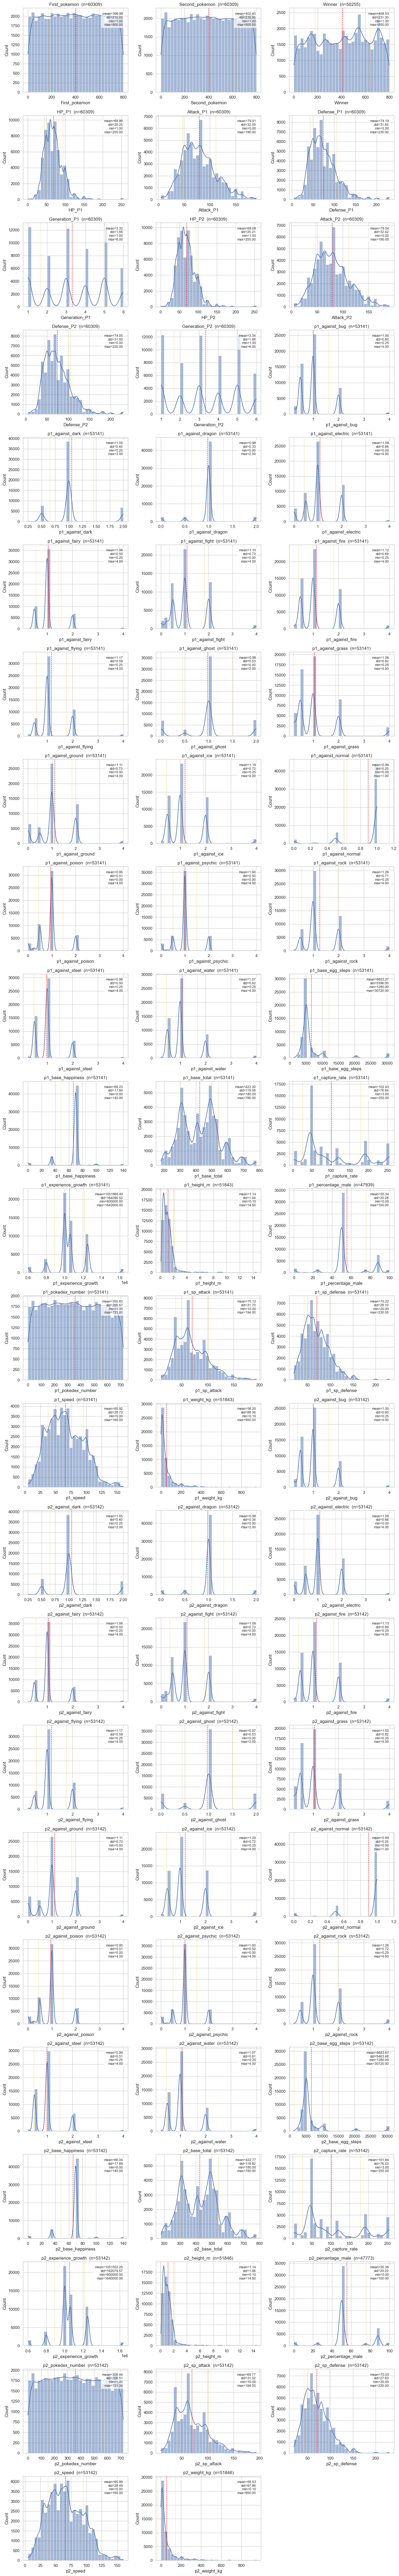

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
num_cols = pokemon.select_dtypes(include=[np.number]).columns.tolist()

if not num_cols:
    print("Không có cột numerical để vẽ histogram.")
else:
    n = len(num_cols)
    cols_per_row = 3
    rows = (n + cols_per_row - 1) // cols_per_row
    fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 4))
    axes = axes.flatten() if n > 1 else [axes]

    for i, col in enumerate(num_cols):
        ax = axes[i]
        data = pokemon[col].dropna()
        if data.empty:
            ax.text(0.5, 0.5, "No data", ha="center")
            ax.set_title(col)
            ax.axis("off")
            continue

        sns.histplot(data, bins=30, kde=True, ax=ax, color="C0")
        mean = data.mean()
        std = data.std()
        ax.axvline(mean, color="red", linestyle="--", linewidth=1)
        ax.axvline(mean - std, color="orange", linestyle=":", linewidth=1)
        ax.axvline(mean + std, color="orange", linestyle=":", linewidth=1)
        ax.set_title(f"{col}  (n={data.count()})")
        ax.annotate(f"mean={mean:.2f}\nstd={std:.2f}\nmin={data.min():.2f}\nmax={data.max():.2f}",
                    xy=(0.95, 0.95), xycoords="axes fraction", ha="right", va="top",
                    fontsize=9, bbox=dict(boxstyle="round,pad=0.3", fc="white", alpha=0.7))

    # turn off any unused subplots
    for j in range(n, len(axes)):
        axes[j].axis("off")

    plt.tight_layout()
    plt.show()

1. Nhiều cột có phân phối gần như đồng đều (uniform distribution)

Một số histogram cho thấy:

- Cột trải dài toàn bộ range

- Mật độ trải đều

- Không có peak đặc biệt

→ Đây có thể là ID, số thứ tự, hoặc dữ liệu không mang nhiều thông tin dự đoán, không mang ý nghĩa thống kê 

```
['First_pokemon', 'Second_pokemon', 'Winner', 'p1_pokemon_id', 'p1_Generation', 'p1_pokedex_number',

'p1_generation', 'p2_pokemon_id', 'p2_Generation', 'p2_pokedex_number', 'p2_generation']

```

2. Hầu hết các biến không tuân theo phân phối chuẩn (Non-Normal Distribution)

Nhiều histogram thể hiện dạng:

- Lệch phải (right-skewed): giá trị nhỏ xuất hiện nhiều, giá trị lớn kéo dài về bên phải

- Lệch trái (left-skewed) ở một vài biến

Một số biến có nhiều đỉnh (multi-modal) có thể xuất hiện do:

- phân nhóm tự nhiên trong dữ liệu,

- các category/hệ/level khác nhau trong dataset.

Ý nghĩa:
→ Các thuật toán nhạy cảm với phân phối chuẩn (Linear Regression, KNN, Logistic Regression…) có thể hoạt động kém nếu không xử lý, có thể cần:

log-transform, box-cox/power transform hoặc scaling.

3. Nhiều biến có Outliers rõ rệt

Tại các biểu đồ có vạch đỏ – vàng – cam (mean, median, mode) kết hợp với phần đuôi kéo dài, ta thấy:

Một số biến có các điểm cực đoan cách xa phần lớn dữ liệu.

Outlier thường nằm ở đuôi phải đối với biến có skewed distribution.

Ý nghĩa:
→ Outlier có thể làm méo mean, kéo lệch phân phối.
→ Tùy mục tiêu, có thể:

- giữ lại (nếu outlier mang thông tin thực)

- winsorize

- loại bỏ

- hoặc chuyển đổi log để giảm ảnh hưởng.

4. Một số biến có phân phối rời rạc hoặc cụm (clustered distribution)

Một số histogram xuất hiện với nhiều “đỉnh nhỏ” tách rời nhau.
Điều này báo hiệu:

dữ liệu có thể mang tính categorical encoded dưới dạng số,

hoặc sự tồn tại của nhóm đối tượng khác nhau (ví dụ: nhóm cấp độ, hệ, vùng…).

Ý nghĩa:
→ Không nên xem những biến này như numerical liên tục hoàn toàn có thể xem xét:

chuyển thành dạng category, hoặc dùng one-hot/target encoding.

t nghĩ phần của t cần có code của phần 1 preprocessing í, xử lý missing values xong plot sẽ chuẩn hơn ạ